# DataCamp - Preparing for Statistics Interview Questions in Python

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Preparing for Statistics Interview Questions in Python/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from numpy.random import randint
from scipy.stats import bernoulli, binom, norm

import math
from sklearn import preprocessing

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind

from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.power import  zt_ind_solve_power

from statsmodels.sandbox.stats.multicomp import multipletests

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, precision_score, recall_score


##    CHAPTER 1  - Probability and Sampling Distributions


#### Exercício 1 - Conditional probabilities

In [4]:
# vídeo

Exercício 2

Exercício 3

Bayes' theorem applied

Let's actually solve out a pretty straightforward, yet typical Bayes' theorem interview problem. You have two coins in your hand. Out of the two coins, one is a real coin and the other one is a faulty coin with tails on both sides.

You are blindfolded and forced to choose a random coin and then toss it in the air.

In [5]:
# Print the probability of the coin landing tails.
print(0.5*0.5 + 0.5*1)

# Print the probability of the coin being faulty.
print(0.5)

# Print the probability of the coin being faulty and landing tails.
print(0.5)

# Print and solve for the probability that the coin is faulty, given it came down on tails.
print(1*0.5/(0.5*0.5 + 0.5*1))

0.75
0.5
0.5
0.6666666666666666


#### Exercício 4 - Central Limit Theorem

In [6]:
# vídeo

print("""The Law of Large numbers is different. It says that as the size of the sample increase, the estimate of the 
sample mean will more accurately reflect the population mean.\n """)

# Simulating Central Limit Theorem in Python

# List comprehension

The Law of Large numbers is different. It says that as the size of the sample increase, the estimate of the 
sample mean will more accurately reflect the population mean.
 


Exercício 5

In [7]:
# Samples from a rolled die

# Let's work through generating a simulation using the numpy package. You'll work with the same scenario from the slides, 
# simulating rolls from a standard die numbered 1 through 6, using the randint() function. Take a look at the documentation
# for this function if you haven't encountered it before.

# Starting with a small sample and working your way up to a larger sample, examine the outcome means and come to a 
# conclusion about the underlying theorem.

from numpy.random import randint

# Create a sample of 10 die rolls
small = randint(1, 7, 10)

# Calculate and print the mean of the sample
small_mean = small.mean()
print(small_mean)

# Create a sample of 1000 die rolls
large = randint(1, 7, 1000)

# Calculate and print the mean of the large sample
large_mean = large.mean()
print(large_mean)

print("""\nNotice how the mean of the large sample has gotten closer to the true expected mean value of 3.5 for a rolled 
die. Which theorem did you say was being demonstrated here? ---> The law of large numbers.""")


4.2
3.544

Notice how the mean of the large sample has gotten closer to the true expected mean value of 3.5 for a rolled 
die. Which theorem did you say was being demonstrated here? ---> The law of large numbers.


Exercício 6

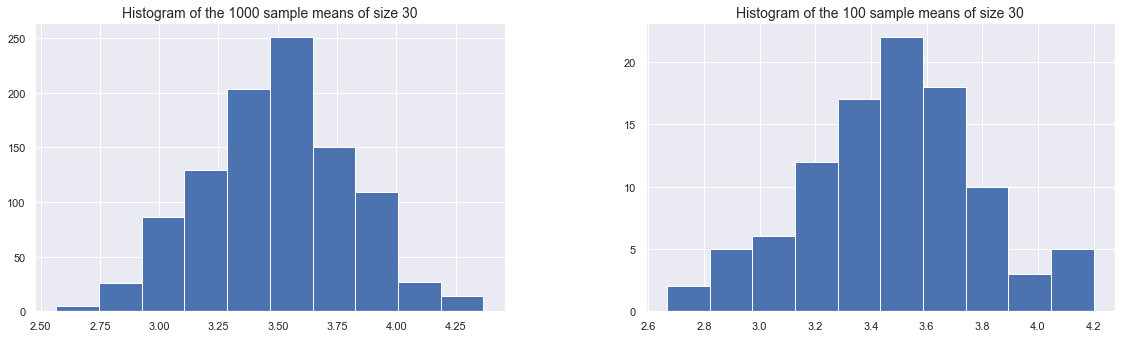

Note how whether we took 100 or 1000 sample means, the distribution was still approximately normal. 

This will always be the case when we have a large enough sample (typically above 30). 
That's the central limit theorem at work. It serves as the basis for all statistical experiments.


In [8]:
# Simulating central limit theorem

# Now that we have some practice creating a sample, we'll look at simulating the central limit theorem, similar to what you
#saw in the slides. We'll also continue dealing with a standard die numbered 1 through 6.
#In order to do this, you'll take a collection of sample means from numpy and examine the distribution of them using the 
# matplotlib package, which has been imported as plt for the rest of the chapter.

from numpy.random import randint

# Create a list of 1000 sample means of size 30
means = [randint(1, 7, 30).mean() for i in range(1000)]

# Create and show a histogram of the means
plt.subplot(1, 2, 1)
plt.hist(means)
plt.title('Histogram of the 1000 sample means of size 30', fontsize=14)

# Adapt code for 100 samples of size 30
means = [randint(1, 7, 30).mean() for i in range(100)]

# Create and show a histogram of the means
plt.subplot(1, 2, 2)
plt.hist(means)
plt.title('Histogram of the 100 sample means of size 30', fontsize=14)

plt.subplots_adjust(left=0, bottom=0, right=2.5, top=1, wspace=0.3, hspace=0.3)
plt.show()

print("""Note how whether we took 100 or 1000 sample means, the distribution was still approximately normal. 

This will always be the case when we have a large enough sample (typically above 30). 
That's the central limit theorem at work. It serves as the basis for all statistical experiments.""")

#### Exercício 7 - Probability distributions

Bernoulli distribution - coin flips is a common example - the Bernoulli distribution is a discrete distribution that
models the probability of 2 outcomes.


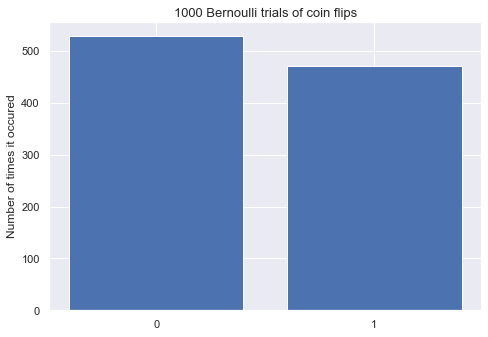

In [9]:
#vídeo

# Bernoulli distribution

print("""Bernoulli distribution - coin flips is a common example - the Bernoulli distribution is a discrete distribution that
models the probability of 2 outcomes.""")

def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p and return (number of successes, n - nr successes)."""
    n_success = 0
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()
        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1
    return n_success, n - n_success

number_of_1s, number_of_0s = perform_bernoulli_trials(1000, 0.5)

bernoulli_df = pd.DataFrame(data={"Number of 1's": number_of_1s, "Number of 0's": number_of_0s}, index=[0])

plt.bar([0, 1], [number_of_0s, number_of_1s])
plt.title('1000 Bernoulli trials of coin flips', fontsize=13)
plt.xticks([1, 0])
plt.ylabel('Number of times it occured')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.3, hspace=0.3)
plt.show()

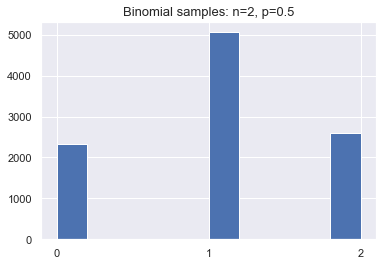

In [10]:
# Binomial distribution

samples = np.random.binomial(2, 0.5, size=10000)
plt.hist(samples)
plt.xticks([0, 1, 2])
plt.title('Binomial samples: n=2, p=0.5', fontsize=13)
plt.show()

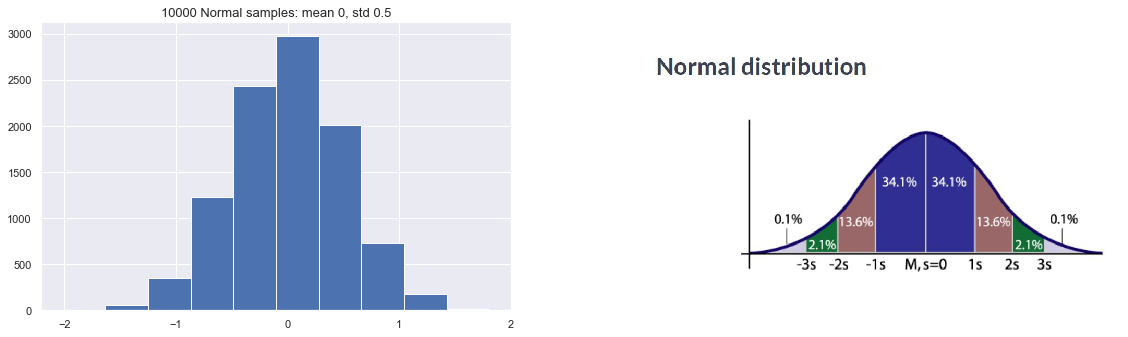

In [11]:
# The normal distribution

samples = np.random.normal(0, 0.5, size=10000)
plt.subplot(1, 2, 1)
plt.hist(samples)
plt.xticks(np.arange(-2, 3, 1))
plt.title('10000 Normal samples: mean 0, std 0.5', fontsize=13)

plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "normal_dist.JPG")
plt.axis('off')
plt.imshow(imagem)

plt.subplots_adjust(left=0, bottom=0, right=2.5, top=1, wspace=0.3, hspace=0.3)
plt.show()

The Poisson distribution represents a count or the number of times something happened. It's computed not by a 
probability p and the number of trials n, but by an average rate given by lambda, λ.


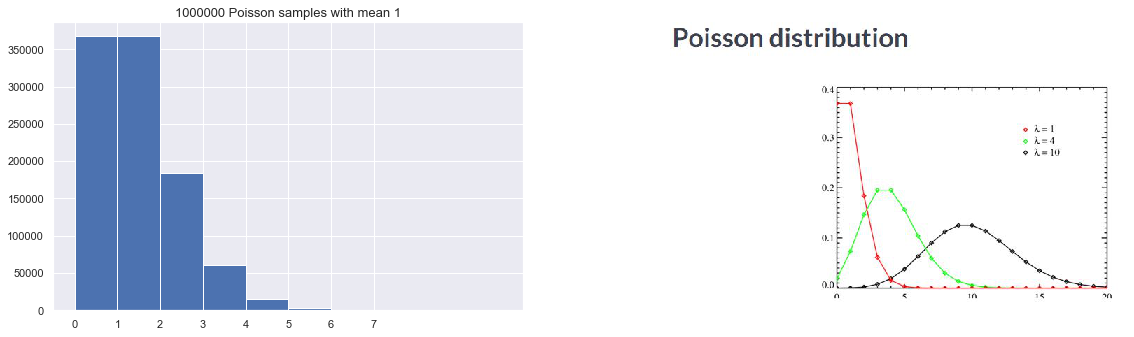

Poisson is the way to go for counting events over time given some continuous rate. 


In [12]:
# Poisson distribution
print("""The Poisson distribution represents a count or the number of times something happened. It's computed not by a 
probability p and the number of trials n, but by an average rate given by lambda, λ.""")

samples = np.random.poisson(1, size=1000000)
plt.subplot(1, 2, 1)
plt.hist(samples)
plt.xticks(np.arange(0, 8, 1))
plt.title('1000000 Poisson samples with mean 1', fontsize=13)

plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "poisson_dist.JPG")
plt.axis('off')
plt.imshow(imagem)

plt.subplots_adjust(left=0, bottom=0, right=2.5, top=1, wspace=0.3, hspace=0.3)
plt.show()
print("""Poisson is the way to go for counting events over time given some continuous rate. """)

Exercício 8

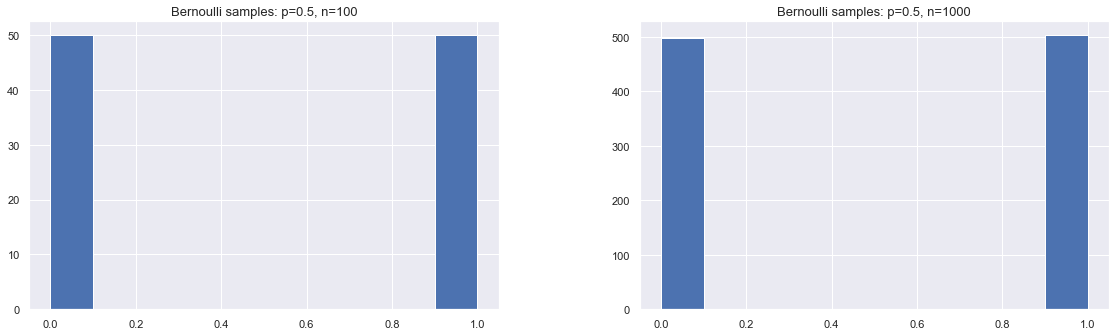

Notice that heads and tails didn't have the exact same probability with a sample size of just 100. This is no 
fluke — when sampling, we won't always get perfect results. We can increase our accuracy however, as you saw when you upped 
the sample size to 1,000 observations. 


In [13]:
# Bernoulli distribution

# Generate bernoulli data
from scipy.stats import bernoulli
data = bernoulli.rvs(p=0.5, size=100)

# Plot distribution
plt.subplot(1, 2, 1)
plt.hist(data)
plt.title('Bernoulli samples: p=0.5, n=100', fontsize=13)

# Addapt to 1000 samples
data = bernoulli.rvs(p=0.5, size=1000)

# Plot distribution
plt.subplot(1, 2, 2)
plt.hist(data)
plt.title('Bernoulli samples: p=0.5, n=1000', fontsize=13)
plt.subplots_adjust(left=0, bottom=0, right=2.5, top=1, wspace=0.3, hspace=0.3)
plt.show()
print("""Notice that heads and tails didn't have the exact same probability with a sample size of just 100. This is no 
fluke — when sampling, we won't always get perfect results. We can increase our accuracy however, as you saw when you upped 
the sample size to 1,000 observations. """)

Exercício 9

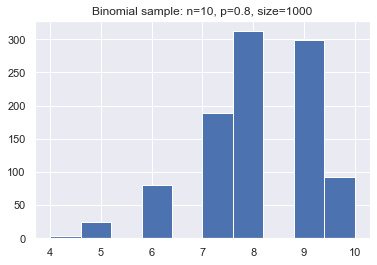

Probability of 8 or less successes: 0.6241903616
Probability of 10 or less successes: 0.10737418240000005


In [14]:
# Binomial distribution

# Generate binomial data
from scipy.stats import binom
data = binom.rvs(n=10, p=0.8, size=1000)

# Plot the distribution
plt.hist(data)
plt.title('Binomial sample: n=10, p=0.8, size=1000')
plt.show()

# Assign and print probability of 8 or less successes
prob1 = binom.cdf(k=8, n=10, p=0.8)
print("Probability of 8 or less successes: {}".format(prob1))

# Assign and print probability of all 10 successes
prob2 = binom.pmf(k=10, n=10, p=0.8)
print("Probability of 10 or less successes: {}".format(prob2))

Exercício 10

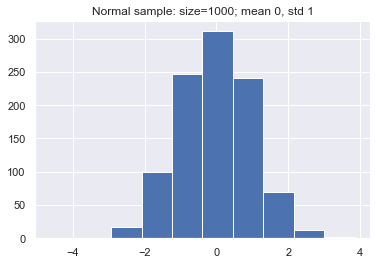

true probability for greater than 2: 0.02275013194817921
sample probability for greater than 2: 0.024


In [15]:
# Normal distribution

# Generate normal data
from scipy.stats import norm
data = norm.rvs(size=1000)

# Plot distribution
plt.hist(data)
plt.title('Normal sample: size=1000; mean 0, std 1')
plt.show()

# Compute and print true probability for greater than 2
true_prob = 1 - norm.cdf(2)
print("true probability for greater than 2: {}".format(true_prob))

# Compute and print sample probability for greater than 2
sample_prob = sum(obs > 2 for obs in data) / len(data)
print("sample probability for greater than 2: {}".format(sample_prob))

# CHAPTER 2 - Exploratory Data Analysis

#### Exercício 1 - Descriptive statistics

In [16]:
# vídeo

# measures of centrality
 # mean, median, mode

# measures of variability
 # variance, standard deviation
# Modality (of the distribution) - determined by the number of peaks the distribution contains
  # most distributions have only 1 peak, but there are bimodal distributions and etc

# Skewness - it's a measure of the symmetry of the distribution

print("question: how would you run an A/B test if your results were skewed?")

question: how would you run an A/B test if your results were skewed?


Exercício 2

Date period: 2007-11-01 to 2017-06-25


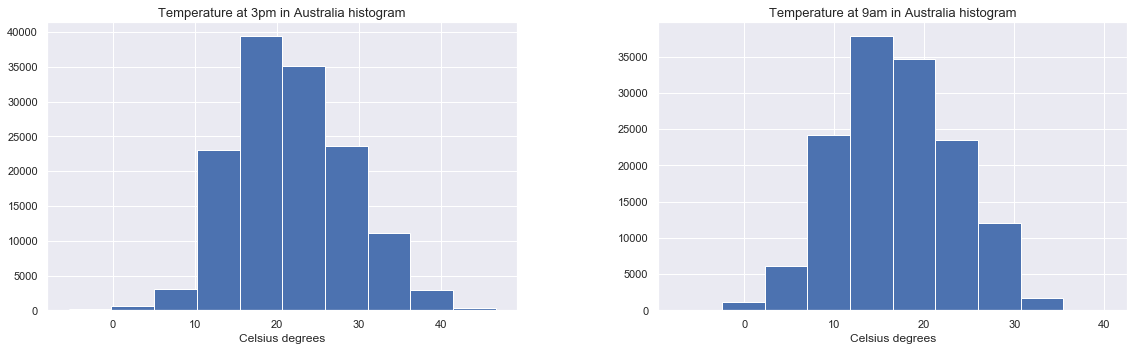

Temp3pm Mean: 21.687234973147824
Temp3pm Median: 21.1
Temp9am Mean: 16.987508581701174
Temp9am Median: 16.7

Both a bit skewed to the right: the median is a bit smaller than the mean in both times of the day.


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
44351,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,3.6,Yes
44352,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,3.6,Yes
44353,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,39.8,Yes
44354,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,2.8,Yes
44355,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,0.0,No


In [17]:
# Mean or median

weather = pd.read_csv(data_folder + "weatherAUS.csv")  # Australian weather
weather = weather.sort_values('Date')

print("Date period: {} to {}".format(weather.Date.min(), weather.Date.max()))
print("=====================================================================")
# Visualize the distribution 
plt.subplot(1, 2, 1)
plt.hist(weather.Temp3pm.dropna())
plt.title('Temperature at 3pm in Australia histogram', fontsize=13)
plt.xlabel('Celsius degrees')

###

# Visualize the distribution 
plt.subplot(1, 2, 2)
plt.hist(weather.Temp9am.dropna())
plt.title('Temperature at 9am in Australia histogram', fontsize=13)
plt.xlabel('Celsius degrees')

plt.subplots_adjust(left=0, bottom=0, right=2.5, top=1, wspace=0.3, hspace=0.3)
plt.show()

# Assign the mean to the variable and print the result
mean = weather['Temp3pm'].mean()
print('Temp3pm Mean:', mean)

# Assign the median to the variable and print the result
median = weather['Temp3pm'].median()
print('Temp3pm Median:', median)

# Assign the mean to the variable and print the result
mean = weather['Temp9am'].mean()
print('Temp9am Mean:', mean)

# Assign the median to the variable and print the result
median = weather['Temp9am'].median()
print('Temp9am Median:', median)

print("\nBoth a bit skewed to the right: the median is a bit smaller than the mean in both times of the day.")

weather.head()

Exercício 3

In [18]:
# Standard deviation by hand

# Create a sample list
import math
nums = [1, 2, 3, 4, 5]

# Compute the mean of the list
mean = sum(nums) / len(nums)

# Compute the variance and print the std of the list
variance = sum(pow(x - mean, 2) for x in nums) / len(nums)
std = math.sqrt(variance)
print(std)

# Compute and print the actual result from numpy
real_std = np.array(nums).std()
print(real_std)

1.4142135623730951
1.4142135623730951


#### Exercício 4 - Categorical data

In [19]:
#vídeo

# Encoding categorical data
#  Label encoding  vs  One Hot encoding

# boxplot

Exercício 5

In [20]:
# Encoding techniques

laptops = pd.read_csv(data_folder + "laptops.csv", encoding="ISO-8859-1").drop('Unnamed: 0', axis=1) # laptop prices
print(laptops.columns)
laptops.head()

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [21]:
from sklearn import preprocessing

# Create the encoder and print our encoded new_vals
encoder = preprocessing.LabelEncoder()
new_vals = encoder.fit_transform(laptops['Company'])
print("LabelEncoder: ", new_vals.tolist()[:30], "...", "\n")

print("get_dummies:")
# One-hot encode Company for laptops2
laptops2 = pd.get_dummies(data=laptops.copy(), columns=['Company'])
laptops2.drop(['TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight'], 1).head()

LabelEncoder:  [1, 1, 7, 1, 1, 0, 1, 1, 2, 0, 7, 7, 1, 4, 1, 1, 4, 1, 10, 4, 2, 10, 7, 4, 7, 4, 1, 4, 4, 7] ... 

get_dummies:


,Product,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,MacBook Pro,1339.69,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Macbook Air,898.94,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,250 G6,575.00,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,MacBook Pro,2537.45,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,MacBook Pro,1803.60,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Exercício 6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
Company             1303 non-null object
Product             1303 non-null object
TypeName            1303 non-null object
Inches              1303 non-null float64
ScreenResolution    1303 non-null object
Cpu                 1303 non-null object
Ram                 1303 non-null object
Memory              1303 non-null object
Gpu                 1303 non-null object
OpSys               1303 non-null object
Weight              1303 non-null object
Price_euros         1303 non-null float64
dtypes: float64(2), object(10)
memory usage: 122.2+ KB


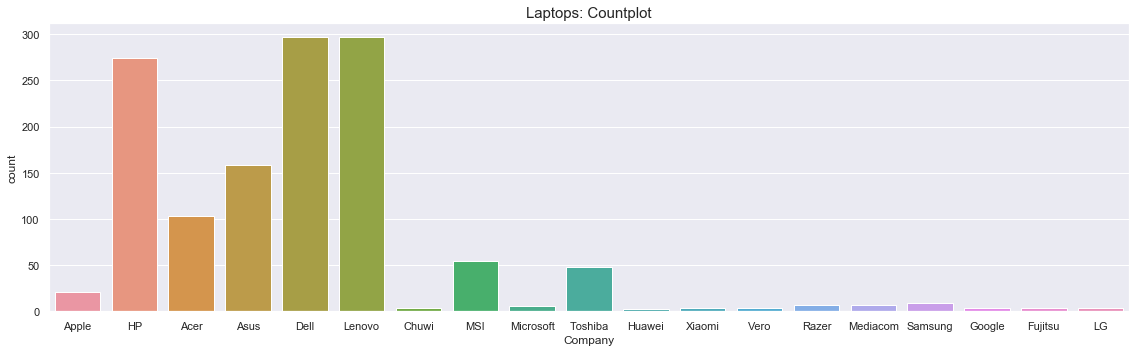

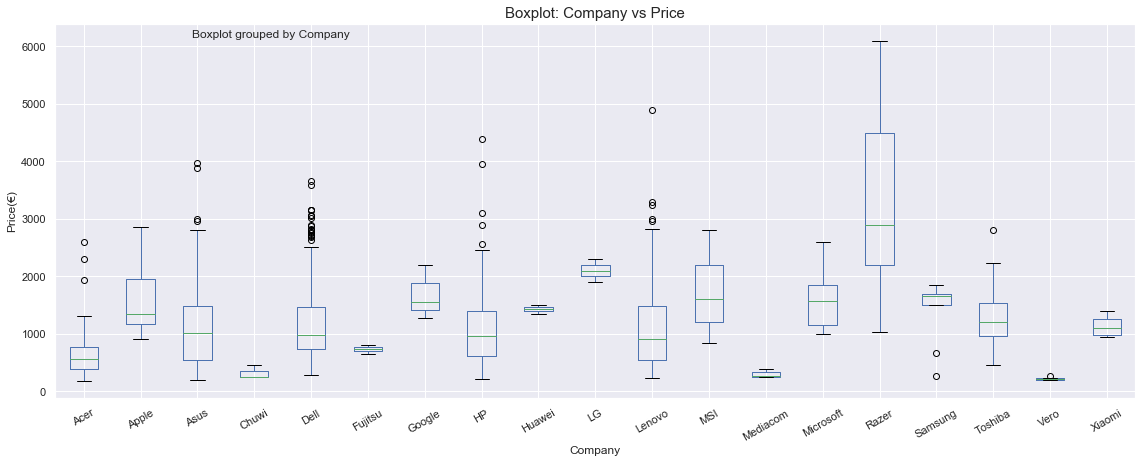

In [22]:
# Exploring laptop prices

# Get some initial info about the data
laptops.info()

# Produce a countplot of companies
sns.countplot(laptops.Company)
plt.title('Laptops: Countplot', fontsize=15)
plt.subplots_adjust(left=0, bottom=0, right=2.5, top=1, wspace=0.3, hspace=0.3)
plt.show()

print("\n")

# Visualize the relationship with price
laptops.boxplot('Price_euros', 'Company', rot=30)
plt.title('Boxplot: Company vs Price', fontsize=15)
plt.ylabel('Price(€)')
plt.subplots_adjust(left=0, bottom=-0.3, right=2.5, top=1, wspace=0.3, hspace=0.3)
plt.show()


#### Exercício 7 - Two or more variables

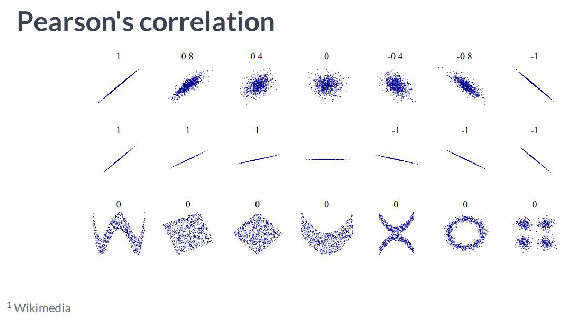

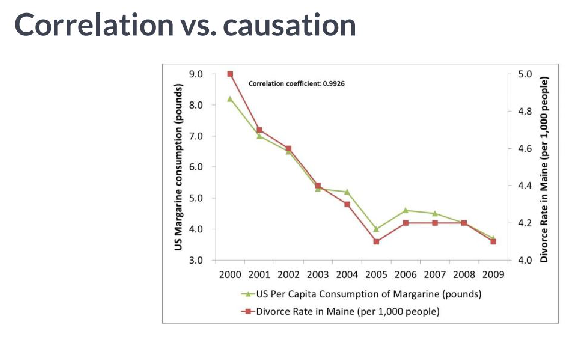

In [23]:
#vídeo

# correlation
# covariance
# Pearson's correlation

imagem = plt.imread(data_folder + "pearson_corr.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.5, right=1.3, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

# correlation vs causation
imagem = plt.imread(data_folder + "corr_causation.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.5, right=1.3, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

Exercício 8

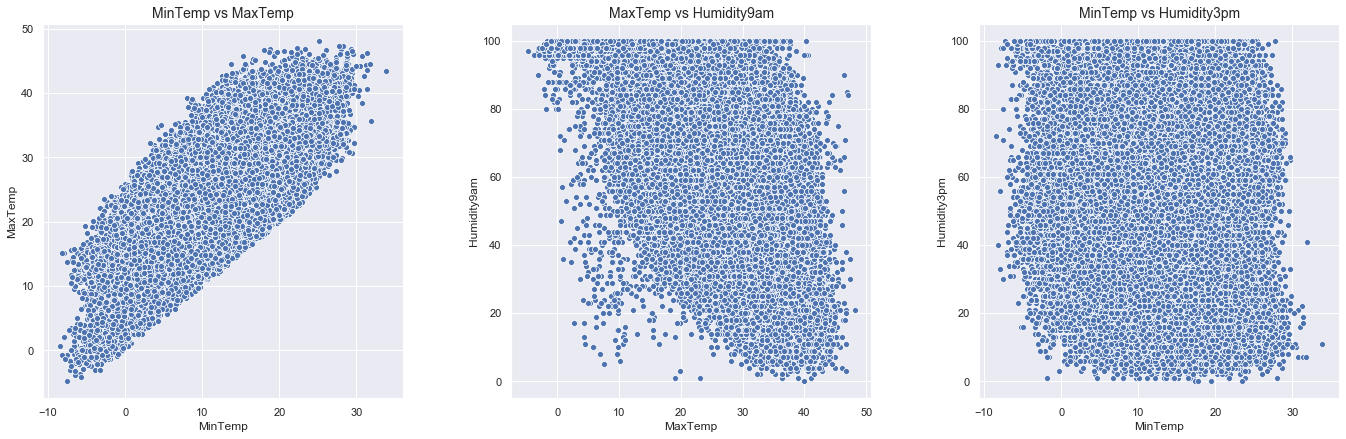

In [24]:
# Types of relationships

# Display a scatter plot and examine the relationship
plt.subplot(1, 3, 1)
sns.scatterplot(weather.MinTemp, weather.MaxTemp, data=weather)
plt.title('MinTemp vs MaxTemp', fontsize=14)

# Display a scatter plot and examine the relationship
plt.subplot(1, 3, 2)
sns.scatterplot(weather.MaxTemp, weather.Humidity9am)
plt.title('MaxTemp vs Humidity9am', fontsize=14)

# Display a scatter plot and examine the relationship
plt.subplot(1, 3, 3)
sns.scatterplot(weather.MinTemp, weather.Humidity3pm)
plt.title('MinTemp vs Humidity3pm', fontsize=14)

plt.subplots_adjust(left=0, bottom=-0.3, right=3, top=1, wspace=0.3, hspace=0.3)
plt.show()

Exercício 9

In [25]:
print(weather.shape)
weather.head()

(142193, 24)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
44351,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,3.6,Yes
44352,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,3.6,Yes
44353,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,39.8,Yes
44354,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,2.8,Yes
44355,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,0.0,No


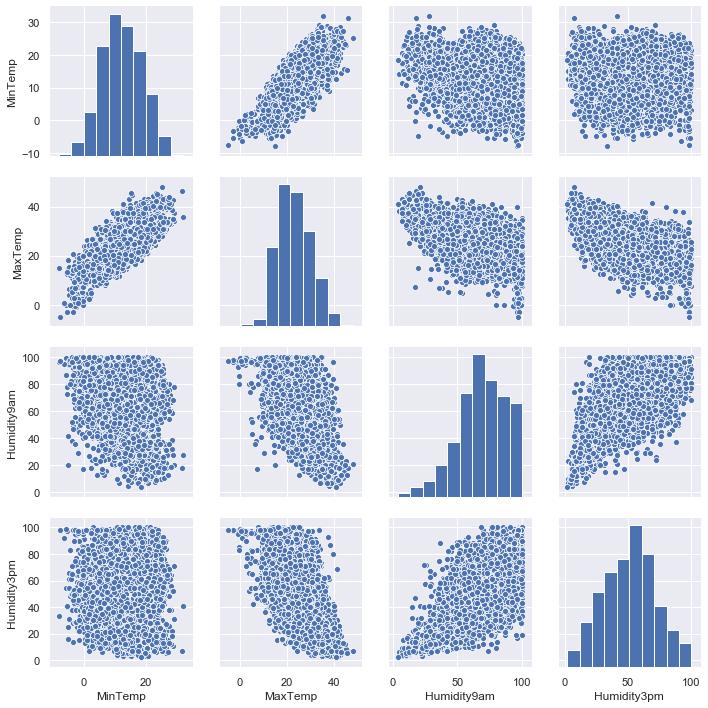

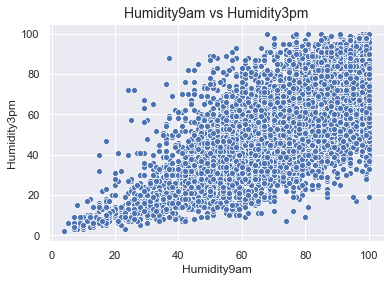

Pearson correlation between Humidity9am and Humidity3pm: 0.6673878396369101
r-squared value: 0.445406528495222

Humidity in the afternoon has a moderately strong correlation with morning humidity, giving us a ~0.67 pearson 
coefficient. When we square that result, we get a r-squared value of ~0.45, meaning that Humidity9am explains around 45%
of the variability in the Humidity3pm variable. 


In [26]:
# Pearson correlation

# weather sample of these 4 variables
weather_sub = weather[['MinTemp',  'MaxTemp',  'Humidity9am',  'Humidity3pm']].dropna().sample(frac=0.05)

# Generate the pair plot for the weather dataset
sns.pairplot(weather_sub)
plt.show()

# Look at the scatter plot for the humidity variables
sns.scatterplot(weather_sub.Humidity9am, weather_sub.Humidity3pm)
plt.title('Humidity9am vs Humidity3pm', fontsize=14)
plt.show()

# Compute and print the Pearson correlation
r = weather['Humidity3pm'].corr(weather['Humidity9am'])
print("Pearson correlation between Humidity9am and Humidity3pm: {}".format(r))

# Calculate the r-squared value and print the result
r2 = r**2
print("r-squared value: {}".format(r2))

print("""\nHumidity in the afternoon has a moderately strong correlation with morning humidity, giving us a ~0.67 pearson 
coefficient. When we square that result, we get a r-squared value of ~0.45, meaning that Humidity9am explains around 45%
of the variability in the Humidity3pm variable. """)

Exercício 10

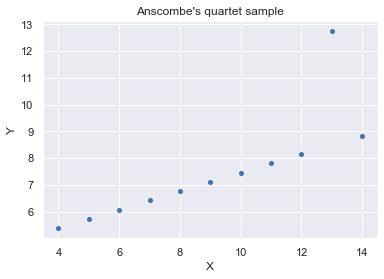

correlation: 0.8162867394895982
correlation after droping the outlier: 0.9999965537848283


In [27]:
# Sensitivity to outliers

#  sample dataset from the famous Anscombe's quartet 
df = pd.DataFrame({'X': [10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.], 
                  'Y': [ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15, 6.42,  5.73]})

# Display the scatter plot of X and Y
sns.scatterplot(df.X, df.Y)
plt.title("Anscombe's quartet sample")
plt.show()

# Compute and print the correlation
corr  = df['X'].corr(df['Y'])
print('correlation: {}'.format(corr))

# Drop the outlier from the dataset
df = df.drop(df.index[2])

# Compute and print the correlation once more
new_corr = df['X'].corr(df['Y'])
print('correlation after droping the outlier: {}'.format(new_corr))

# Chapter 3 - Statistical Experiments and Significance Testing

#### Exercício 1 - Confidence intervals

In [28]:
#vídeo

# Confidence interval
print("""A confidence interval is a range of values that we are fairly/confidently sure that includes the true value of 
an unknown population parameter. If we have a 95% confidence interval, it means that we can expect that 95 times out of 
100 the interval to hold the true parameter value of our population.
A step further: why do we even use confidence levels? """)

# Calculating confidence intervals - straightforward, it just varies slightly if you're working with means or proportions
# mean +- margin of error

# Example: means
import scipy.stats as st
a = range(10,14)
st.t.interval(0.95, len(a) - 1, loc = np.mean(a), scale = st.sem(a))

# Example: proportions
#import statsmodels.api as sm
#from sm.stats.proportion import proportion_conf
#proportion_confint(4, 10, .05)

A confidence interval is a range of values that we are fairly/confidently sure that includes the true value of 
an unknown population parameter. If we have a 95% confidence interval, it means that we can expect that 95 times out of 
100 the interval to hold the true parameter value of our population.
A step further: why do we even use confidence levels? 


(9.445739743239121, 13.554260256760879)

Exercício 2

In [29]:
# Confidence interval by hand

sample_mean = 3
z_score = 2.7764451051977987  

from scipy.stats import sem, t
data = [1, 2, 3, 4, 5]
confidence = 0.95

# Compute the standard error and margin of error
std_err = sem(data)
margin_error = std_err * z_score

# Compute and print the lower threshold
lower = sample_mean - margin_error
print("lower threshold: {}".format(lower))

# Compute and print the upper threshold
upper = sample_mean + margin_error
print("upper threshold: {}".format(upper))

lower threshold: 1.036756838522439
upper threshold: 4.9632431614775605


Bootstrap 95% confidence interval = [1.8 4.2]


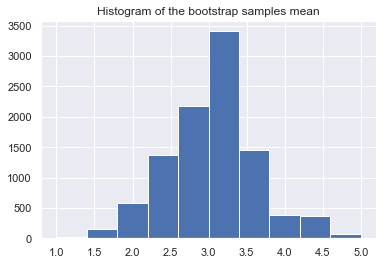

In [30]:
# Bootstrap approach 

# bootstrap replicate
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data))) # replace=True (default) --> with replacement

# generates many bootstrap replicates from the data set. 
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

bs_replicates = draw_bs_reps(data, np.mean, 10000)

# 95% confidence interval
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

print('Bootstrap 95% confidence interval =', conf_int)

plt.hist(bs_replicates)
plt.title('Histogram of the bootstrap samples mean')
plt.show()

In [31]:
# Frequentist approach

from scipy import stats

# margin of error 
margin_error = stats.norm.ppf(0.975) * np.std(data)  

# 95% confidence interval
c_interval_left = np.mean(data) - margin_error
c_interval_right = np.mean(data) + margin_error

#or 
c_interval = stats.norm.interval(0.95, loc=np.mean(data), scale=np.std(data))

print("For one draw, the 95% confidence interval is [", c_interval_left, ",", c_interval_right, "]")
c_interval

For one draw, the 95% confidence interval is [ 0.22819235130064408 , 5.771807648699356 ]


(0.22819235130064408, 5.771807648699356)

Exercício 3

In [32]:
%%script false
# Applying confidence intervals

# we've generated a binomial sample of the number of heads in 50 fair coin flips saved as the heads variable. 
# You'll compute a few different confidence intervals for this sample, and then scale your work for 10 similar samples.

from sm.stats.proportion import proportion_conf

heads = 27

# Compute and print the 99% confidence interval
confidence_int = proportion_confint(heads, 50, 0.01)
print("99% confidence interval:", confidence_int)

# Compute and print the 90% confidence interval
confidence_int = proportion_confint(heads, 50, 0.10)
print("90% confidence interval:", confidence_int)

# Repeat this process 10 times 
heads = binom.rvs(50, 0.5, size=10)
for val in heads:
    confidence_interval = proportion_confint(val, 50, .10)
    print(confidence_interval)
    

Couldn't find program: 'false'


In [33]:
bern_coin = bernoulli.rvs(p=0.5, size=50)

print("99% confidence interval:", stats.norm.interval(0.99, loc=np.mean(bern_coin), scale=np.std(bern_coin)))
print("95% confidence interval:", stats.norm.interval(0.95, loc=np.mean(bern_coin), scale=np.std(bern_coin)), "\n")

# multiple draws
for i in range(10):
    bern_coin = bernoulli.rvs(p=0.5, size=50)
    print("90% confidence interval:", stats.norm.interval(0.90, loc=np.mean(bern_coin), scale=np.std(bern_coin)))
    
print("""\nIn this case the true value (0.5) always appears within the intervals, but if not we can always increase the
confidence level.""")

99% confidence interval: (-0.806883907590306, 1.766883907590306)
95% confidence interval: (-0.49919769283084703, 1.459197692830847) 

90% confidence interval: (-0.37648386823568675, 1.2564838682356865)
90% confidence interval: (-0.3417686086376235, 1.301768608637623)
90% confidence interval: (-0.2564838682356866, 1.3764838682356864)
90% confidence interval: (-0.37648386823568675, 1.2564838682356865)
90% confidence interval: (-0.2564838682356866, 1.3764838682356864)
90% confidence interval: (-0.41838965285434393, 1.1783896528543436)
90% confidence interval: (-0.4295297409367069, 1.1495297409367065)
90% confidence interval: (-0.32242681347573643, 1.3224268134757362)
90% confidence interval: (-0.279790823318547, 1.3597908233185467)
90% confidence interval: (-0.359790823318547, 1.2797908233185467)

In this case the true value (0.5) always appears within the intervals, but if not we can always increase the
confidence level.


#### Exercício 4 - Hypothesis testing

In [34]:
#vídeo

Exercício 5

In [35]:
# One tailed z-test

print("""The treatment group represents some graphic alteration that we expect to improve the conversion rate of users. 
Run a test with alpha as .05 and find out if the change actually helped.\n""")

results = pd.read_csv(data_folder + 'results_2.csv').drop('Unnamed: 0', 1)

# Assign and print the conversion rate for each group
conv_rates = results.groupby('Group').mean()
print(conv_rates)

# Assign the number of control conversions and trials
num_control = results[results['Group'] == 'control']['Converted'].sum()
total_control = len(results[results['Group'] == 'control'])

# Assign the number of conversions and total trials
num_treat = results[results['Group'] == 'treatment']['Converted'].sum()
total_treat = len(results[results['Group'] == 'treatment'])

######

from statsmodels.stats.proportion import proportions_ztest
count = np.array([num_treat, num_control]) 
nobs = np.array([total_treat, total_control])

# Run the z-test and print the result 
stat, pval = proportions_ztest(count, nobs, alternative="larger")
print('\np-value = {0:0.3f}'.format(pval))
print("didn't had an effect")
results.head()

The treatment group represents some graphic alteration that we expect to improve the conversion rate of users. 
Run a test with alpha as .05 and find out if the change actually helped.

           Converted
Group               
control     0.121393
treatment   0.127236

p-value = 0.188
didn't had an effect


,Group,Converted
0,control,0
1,control,0
2,treatment,0
3,treatment,0
4,control,1


In [36]:
# another way

print("""Null hypothesis (Ho): the graphic alteration does not have an impact on the improvement of the conversion rate 
of users.\n""")

def diff_frac(data_A, data_B):
    frac_A = np.sum(data_A) / len(data_A)
    frac_B = np.sum(data_B) / len(data_B)
    return frac_B - frac_A

def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

#################################################

control = results[results['Group'] == 'control']['Converted']
treatment = results[results['Group'] == 'treatment']['Converted']

#diferença observada
diff_frac_obs = diff_frac(control, treatment)
print("Observed fraction difference: {}".format(diff_frac_obs))

# agora fazemos as replicações
replicates = draw_perm_reps(control, treatment, diff_frac, size=10000)

p_value = np.sum(replicates >= diff_frac_obs) / 10000 
print("p-value: {}".format(p_value))

print("""\nSince the p-value is bigger than the defined significance level (0.05), we do not have sufficient statistical 
evidence to reject the null hypothesis. That is, we can not affirm that the graphic alteration had an impact.""")

Null hypothesis (Ho): the graphic alteration does not have an impact on the improvement of the conversion rate 
of users.

Observed fraction difference: 0.0058431460786519535
p-value: 0.2017

Since the p-value is bigger than the defined significance level (0.05), we do not have sufficient statistical 
evidence to reject the null hypothesis. That is, we can not affirm that the graphic alteration had an impact.


Exercício 6

In [37]:
# Two tailed t-test

#  try to identify a significant difference in price between Asus and Toshiba.

# Display the mean price for each group
prices = laptops.groupby('Company').mean()['Price_euros']
print("Laptop prices (€): \n", prices[['Asus', 'Toshiba']], "\n")


# Assign the prices of each group
asus = laptops[laptops['Company'] == 'Asus']['Price_euros']
toshiba = laptops[laptops['Company'] == 'Toshiba']['Price_euros']

# Run the t-test
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(asus, toshiba)
print('t-test: {0:0.3f}'.format(pval))

print("""\nWith a p-value of .133, we cannot reject the null hypothesis! There's not enough evidence here to conclude that
Toshiba laptops are significantly more expensive than Asus. """)

Laptop prices (€): 
 Company
Asus       1104.169367
Toshiba    1267.812500
Name: Price_euros, dtype: float64 

t-test: 0.133

With a p-value of .133, we cannot reject the null hypothesis! There's not enough evidence here to conclude that
Toshiba laptops are significantly more expensive than Asus. 


In [38]:
# alternativamente

print("Laptop prices (€): \n", laptops.groupby('Company').mean()['Price_euros'][['Asus', 'Toshiba']], "\n")

print("""======================================================================================================
\nNull hypothesis (Ho): There is no significant difference between the price of a Toshiba and of an Asus.
Test statistic: difference of means\n""")

def diff_means(data_1, data_2):
    return np.mean(data_1) - np.mean(data_2)

def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

#################################################

asus = laptops[laptops['Company'] == 'Asus']['Price_euros']
toshiba = laptops[laptops['Company'] == 'Toshiba']['Price_euros']

#diferença observada
observed_diff_means = diff_means(toshiba, asus)
print("Observed mean difference: {}".format(observed_diff_means))

# agora fazemos as replicações
replicates = draw_perm_reps(toshiba, asus, diff_means, size=10000)

p_value = np.sum(replicates >= observed_diff_means) / 10000 
print("p-value: {}".format(p_value))

print("""\nWe can not affirm that there is a significant difference between the average price of a Toshiba and of an Asus 
laptop.
Since the p-value is bigger than the significance level defined (0.05), we do not have sufficient statistical evidence to 
reject the hypothesis that affirms that there is a difference between the average price of these two kind of laptops.""")

Laptop prices (€): 
 Company
Asus       1104.169367
Toshiba    1267.812500
Name: Price_euros, dtype: float64 


Null hypothesis (Ho): There is no significant difference between the price of a Toshiba and of an Asus.
Test statistic: difference of means

Observed mean difference: 163.6431329113925
p-value: 0.0694

We can not affirm that there is a significant difference between the average price of a Toshiba and of an Asus 
laptop.
Since the p-value is bigger than the significance level defined (0.05), we do not have sufficient statistical evidence to 
reject the hypothesis that affirms that there is a difference between the average price of these two kind of laptops.


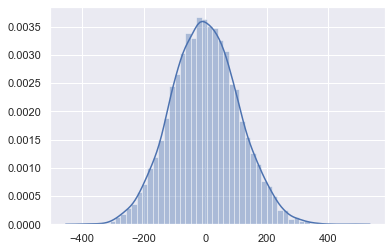

In [39]:
# difference of means will have the same effect as taking out sample means - it will follow normal distribution
sns.distplot(replicates)
plt.show()

#### Exercício 7 - Power and sample size

In [40]:
#vídeo

# how to determine the size of the sample size?
# power analysis

Exercício 8

In [41]:
# Effect on type II error
#Which component discussed earlier is the probability of a Type II error related to?
print("""All: sample size, confidence level and minimum effect size.

Sample size and confidence level are negatively correlated with Type II error, while minimum effect size causes a higher 
chance of Type II error.""")

All: sample size, confidence level and minimum effect size.

Sample size and confidence level are negatively correlated with Type II error, while minimum effect size causes a higher 
chance of Type II error.


Exercício 9

In [42]:
# Calculating sample size

# In this exercise, you're working with a website and want to test for a difference in conversion rate. 
# Before you begin the experiment, you must decide how many samples you'll need per variant using 5% significance and 95% 
# power.

# Standardize the effect size of a conversion rate increase from 20% to 25% success
from statsmodels.stats.proportion import proportion_effectsize
std_effect = proportion_effectsize(.20, .25)

# Assign and print the needed sample size
from statsmodels.stats.power import  zt_ind_solve_power
sample_size = zt_ind_solve_power(effect_size=std_effect, nobs1=None, alpha=0.05, power=0.95)
print("Sample size:", sample_size)

Sample size: 1807.7621477153257


In [43]:
sample_size = zt_ind_solve_power(effect_size=std_effect, nobs1=None, alpha=0.05, power=0.80)
print("Changing to a lower power (80%), the sample size is now necessarily smaller: {}".format(sample_size))
print("""Lowering the power allowed you fewer observations in your sample, yet increased your chance of a Type II error.""")

Changing to a lower power (80%), the sample size is now necessarily smaller: 1091.8961587171943
Lowering the power allowed you fewer observations in your sample, yet increased your chance of a Type II error.


Exercício 10

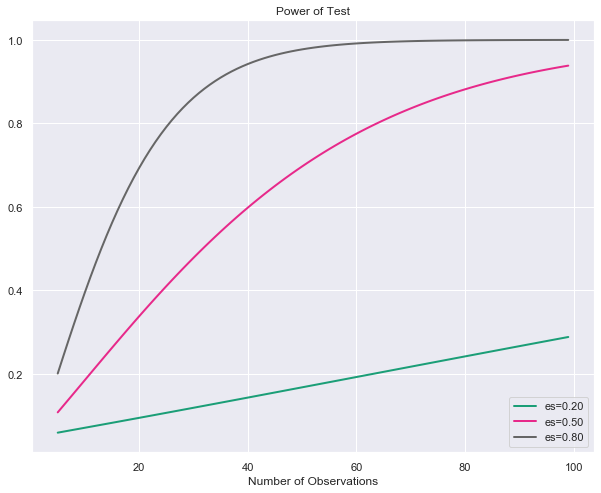

Not only does an increase in power result in a larger sample size, but this increase grows exponentially as the
minimum effect size is increased. 


In [44]:
# Visualizing the relationship - relationship between power and sample size

# In this exercise, we'll switch gears and look at a t-test rather than a z-test. 

sample_sizes = np.array(range(5, 100))
effect_sizes = np.array([0.2, 0.5, 0.8])

# Create results object for t-test analysis
from statsmodels.stats.power import TTestIndPower
results = TTestIndPower()

# Plot the power analysis
results.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.subplots_adjust(left=0, bottom=-0.5, right=1.3, top=1, wspace=0, hspace=0)
plt.show()

print("""Not only does an increase in power result in a larger sample size, but this increase grows exponentially as the
minimum effect size is increased. """)

#### Exercício 11 - Multiple testing

Type 1 error risk - with hypothesis testing, we have a 5% (with alpha=5%) chance of saying it has an effect when 
in fact it doesn't. This is a risk that we are normally willing to take. The multiple comparisons problem arises when we've
run several sequential hypothesis tests. 
Some quick math: Since each test is independent, you can multiply the probability of each type I error to get our combined
probability of a type I error. For example, if we tested 20 different, with 5% significance, there is around a 65% chance 
of at least 1 error. 

Correcting for multiple comparisons
When you run multiple tests, the p-values have to be adjusted for the number of hypothesis tests you are running, in order 
to control for the type I error discussed above. 

There is not an universal way of dealing with multiple testing, but here are some common approaches:

- Bonferroni correction
- Sidak correction
- Step-based procedures
- Tukey’s procedure
- Dunnet’s correction

We're going to see Bonferron

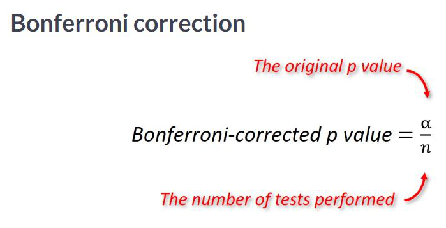

p-values list: [0.01, 0.04, 0.02]
test results:  [ True False False]
corrected p-values:  [0.03 0.12 0.06]

there are some side effects with bonferroni corrections - read more


In [45]:
#vídeo

print("""Type 1 error risk - with hypothesis testing, we have a 5% (with alpha=5%) chance of saying it has an effect when 
in fact it doesn't. This is a risk that we are normally willing to take. The multiple comparisons problem arises when we've
run several sequential hypothesis tests. 
Some quick math: Since each test is independent, you can multiply the probability of each type I error to get our combined
probability of a type I error. For example, if we tested 20 different, with 5% significance, there is around a 65% chance 
of at least 1 error. 

Correcting for multiple comparisons
When you run multiple tests, the p-values have to be adjusted for the number of hypothesis tests you are running, in order 
to control for the type I error discussed above. 

There is not an universal way of dealing with multiple testing, but here are some common approaches:

- Bonferroni correction
- Sidak correction
- Step-based procedures
- Tukey’s procedure
- Dunnet’s correction

We're going to see Bonferroni's correction only for now.""")

imagem = plt.imread(data_folder + "bonferroni.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

# Example
from statsmodels.sandbox.stats.multicomp import multipletests

pvals = [0.01, 0.04, 0.02]

p_adjusted = multipletests(pvals, alpha=.05, method='bonferroni')

print("p-values list: {}".format(pvals))
print("test results: ", p_adjusted[0])
print("corrected p-values: ", p_adjusted[1])

###

# Side effects
print("\nthere are some side effects with bonferroni corrections - read more")

Exercício 12

In [46]:
# Calculating error rates

print("""--> Your colleague is strongly considering running 60 distinct hypothesis tests. In order to convince them 
otherwise, compute the probability of a Type I error for 60 hypothesis tests with a single-test 5% significance level.\n""")

# Print error rate for 60 tests with 5% significance
error_rate = 1 - 0.95**60   # the tests are independent
print("Error rate for 60 tests (Type I error) with 5% significance:", error_rate)

# Print error rate for 30 tests with 5% significance
error_rate = 1 - 0.95**30   # the tests are independent
print("Error rate for 30 tests (Type I error) with 5% significance:", error_rate)

# Print error rate for 10 tests with 5% significance
error_rate = 1 - 0.95**10   # the tests are independent
print("Error rate for 10 tests (Type I error) with 5% significance:", error_rate)

print("""\nThe probability of encountering an error is still extremely high. This is where the Bonferroni correction comes 
in. While a bit conservative, it controls the family-wise error rate for circumstances like these to avoid the high
probability of a Type I error. We'll go over this specific method in the next exercise.""")

--> Your colleague is strongly considering running 60 distinct hypothesis tests. In order to convince them 
otherwise, compute the probability of a Type I error for 60 hypothesis tests with a single-test 5% significance level.

Error rate for 60 tests (Type I error) with 5% significance: 0.953930201013048
Error rate for 30 tests (Type I error) with 5% significance: 0.7853612360570628
Error rate for 10 tests (Type I error) with 5% significance: 0.4012630607616213

The probability of encountering an error is still extremely high. This is where the Bonferroni correction comes 
in. While a bit conservative, it controls the family-wise error rate for circumstances like these to avoid the high
probability of a Type I error. We'll go over this specific method in the next exercise.


Exercício 13

In [47]:
# Bonferroni correction

# Use a single-test significance level of 5% and observe how the Bonferroni correction affects our sample list of p-values.

from statsmodels.sandbox.stats.multicomp import multipletests

pvals = [.01, .05, .10, .50, .99]

# Create a list of the adjusted p-values
p_adjusted = multipletests(pvals, alpha=0.05, method='bonferroni')

# Print the resulting conclusions
print(p_adjusted[0])

# Print the adjusted p-values themselves 
print(p_adjusted[1])

print("""\nThe Bonferroni correction did it's job and corrected the family-wise error rate for our 5 hypothesis test 
results.
In the end, only one of the tests remained signficant. """)

[ True False False False False]
[0.05 0.25 0.5  1.   1.  ]

The Bonferroni correction did it's job and corrected the family-wise error rate for our 5 hypothesis test 
results.
In the end, only one of the tests remained signficant. 


# Chapter 4 - Regression and Classification

#### Exercício 1 - Regression models

In [48]:
#vídeo

# Linear Regression
# Assumptions
# - Linear relationship
# - Errors are normally distributed
# - Homoscedasticity
# - Independent observations

from sklearn.linear_model import LinearRegression

# Logistic Regression

from sklearn.linear_model import LogisticRegression

Exercício 2

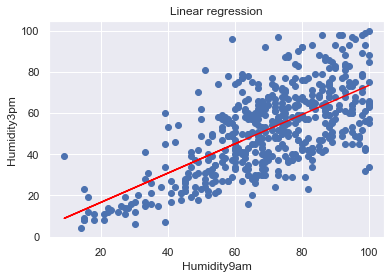

coef: [0.70885085]

Despite some noise in the plot, we have a decent looking fit here using Humidity9am to predict the dependent 
variable Humidity3pm with a linear model.
Furthermore, take another look at our coefficient. This means that for every 1 unit of humidity in the morning, we can 
expect about 0.80 units of humidity in the afternoon. More practically, this information tells us that humidity drops about
20% from morning to afternoon.


In [49]:
# Linear regression

from sklearn.linear_model import LinearRegression 

# sample
weather_linreg = weather.copy()[['Humidity9am', 'Humidity3pm']].dropna().sample(n=500)

X = np.array(weather_linreg['Humidity9am']).reshape(-1, 1)
y = weather_linreg['Humidity3pm']

# Create and fit your linear regression model
lm = LinearRegression()
lm.fit(X, y)

# Assign and print predictions
preds = lm.predict(X)

# Plot your fit to visualize your model
plt.scatter(X, y)
plt.plot(X, preds, color='red')
plt.title('Linear regression')
plt.xlabel('Humidity9am')
plt.ylabel('Humidity3pm')
plt.show()

# Assign and print coefficient 
coef = lm.coef_
print("coef:", coef)
print("""\nDespite some noise in the plot, we have a decent looking fit here using Humidity9am to predict the dependent 
variable Humidity3pm with a linear model.
Furthermore, take another look at our coefficient. This means that for every 1 unit of humidity in the morning, we can 
expect about 0.80 units of humidity in the afternoon. More practically, this information tells us that humidity drops about
20% from morning to afternoon.""")

Exercício 3

In [50]:
# Logistic regression

#the dataset has already been normalized in order to ensure that we can interpret the coefficients later on. 
weather_logreg=weather.copy()[['Humidity9am', 'Humidity3pm', 'RainTomorrow']].dropna().sample(n=500).reset_index(drop=True)
rain=[]
for i in weather_logreg['RainTomorrow']:
    if i == 'Yes':
        rain.append(1)
    else:
        rain.append(0)
weather_logreg['RainTomorrow'] = rain

from sklearn.preprocessing import scale
X = scale(weather_logreg[['Humidity9am', 'Humidity3pm']])
y = weather_logreg['RainTomorrow']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
###########################################
# mean = 0 and std = 1
print("standardizing/scaling by column:")
print("mean:", np.mean([i[0] for i in X]), " ; ", np.mean([i[1] for i in X]))
print("std: ", np.std([i[0] for i in X]), " ; ", np.std([i[1] for i in X]))
print("============================================================================================\n")
###################################################################################################################

from sklearn.linear_model import LogisticRegression

# Create and fit your model
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)

# Compute and print the accuracy
acc = clf.score(X_test, y_test)
print("Accuracy: ", acc)

# Assign and print the coefficents
coefs = clf.coef_
print("coefs", coefs)
print("""\nSince our features were normalized beforehand, we can look at the magnitude of our coefficients to tell us the 
importance of each independent variable. Here you can see the the second variable, Humidity3pm, was much more important to
our outcome than humidity from that morning. This is intuitive since we are trying to predict the rain for tomorrow.""")

weather_logreg.head()

standardizing/scaling by column:
mean: -3.730349362740526e-17  ;  9.414691248821327e-17
std:  1.0  ;  0.9999999999999999

Accuracy:  0.7933333333333333
coefs [[-0.29349118  1.6558899 ]]

Since our features were normalized beforehand, we can look at the magnitude of our coefficients to tell us the 
importance of each independent variable. Here you can see the the second variable, Humidity3pm, was much more important to
our outcome than humidity from that morning. This is intuitive since we are trying to predict the rain for tomorrow.


,Humidity9am,Humidity3pm,RainTomorrow
0,99.0,65.0,0
1,79.0,78.0,1
2,60.0,74.0,1
3,73.0,32.0,0
4,71.0,62.0,0


#### Exercício 4 - Evaluating models

In [51]:
#vídeo

# Regression most common evaluation techniques
#  - R squared
#  - Mean absolute error (MAE) - sum of the absolute residuals over the number of points
#  - Mean squared error (MSE) - sum of the residuals squared over the number of points

# model that minimizes MAE vs model that minimizes MSE | in which cases would each error metric be appropriate?
print("""Typically, if the data hasn't outliers or if I'm worried about individual observations MSE is the way to go.
On the other hand, I would use MAE.\n """)

###############

# Classification techniques
# - Precision, Recall, Confusion matrices

print("Precision - What percent of positive predictions were correct?; use for example with spam")
print("Recall - What percent of the positive cases did you catch?; use for example with medical diagnosis")

Typically, if the data hasn't outliers or if I'm worried about individual observations MSE is the way to go.
On the other hand, I would use MAE.
 
Precision - What percent of positive predictions were correct?; use for example with spam
Recall - What percent of the positive cases did you catch?; use for example with medical diagnosis


Exercício 5

In [52]:
# Regression evaluation

# our previous model
X = np.array(weather_linreg['Humidity9am']).reshape(-1, 1)
y = weather_linreg['Humidity3pm']

# R-squared score
r2 = lm.score(X, y)
print("R2:" , r2)

# Mean squared error
from sklearn.metrics import mean_squared_error
preds = lm.predict(X)
mse = mean_squared_error(y, preds)
print("mean_squared_error:", mse)

# Mean absolute error
from sklearn.metrics import mean_absolute_error
preds = lm.predict(X)
mae = mean_absolute_error(y, preds)
print("mean_absolute_error:", mae)

print("""\nR-squared value tells us the percentage of the variance of y that X is responsible for. 
Which error metric would you recommend for this dataset? If you remember from when you plotted your model fit, 
there aren't too many outliers, so mean squared error would be a good choice to go with.""")

R2: 0.44803837506859834
mean_squared_error: 233.036484757154
mean_absolute_error: 12.457450337566563

R-squared value tells us the percentage of the variance of y that X is responsible for. 
Which error metric would you recommend for this dataset? If you remember from when you plotted your model fit, 
there aren't too many outliers, so mean squared error would be a good choice to go with.


Exercício 6

In [53]:
# Classification evaluation

# Generate and output the confusion matrix
from sklearn.metrics import confusion_matrix
preds = clf.predict(X_test)
matrix = confusion_matrix(y_test, preds)
print("Confusion matrix:\n", matrix)

# score
print("\nAccuracy: ", clf.score(X_test, y_test))

# Compute and print the precision
from sklearn.metrics import precision_score
preds = clf.predict(X_test)
precision = precision_score(y_test, preds)
print("Precision: ", precision)                # tp / (tp + fp) --> What percent of positive **predictions** were correct?
 
# Compute and print the recall
from sklearn.metrics import recall_score
preds = clf.predict(X_test)
recall = recall_score(y_test, preds)
print("Recall: ", recall)                      # tp / (tp + fn) --> What percent of the positive **cases** did you catch?

print("""\nThe precision of our rain prediction model was good, meaning that we didn't make too many Type I errors. 
However, there were plenty of Type II errors shown in the bottom-left quadrant of the confusion matrix. 
This is indicated further by the low recall score, meaning that there were plenty of rainy days that we missed out on.

I would say it might be better to use Recall: it's bad if I say it'll not rain and it does. Worse than saying it will rain
and then it doesn't. Accuracy I would not use since the data is unbalanced - not before balancing it at least.""")

Confusion matrix:
 [[106   5]
 [ 26  13]]

Accuracy:  0.7933333333333333
Precision:  0.7222222222222222
Recall:  0.3333333333333333

The precision of our rain prediction model was good, meaning that we didn't make too many Type I errors. 
However, there were plenty of Type II errors shown in the bottom-left quadrant of the confusion matrix. 
This is indicated further by the low recall score, meaning that there were plenty of rainy days that we missed out on.

I would say it might be better to use Recall: it's bad if I say it'll not rain and it does. Worse than saying it will rain
and then it doesn't. Accuracy I would not use since the data is unbalanced - not before balancing it at least.


In [54]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

print("tn = ", tn)
print("fp = ", fp)
print("fn = ", fn)
print("tp = ", tp)

tn =  106
fp =  5
fn =  26
tp =  13


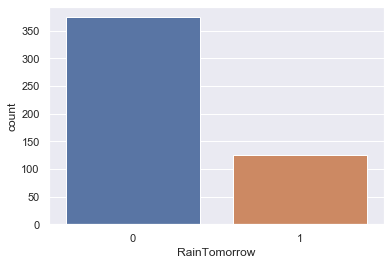

In [55]:
# unbalanced data
sns.countplot(weather_logreg.RainTomorrow)
plt.show()

#### Exercício 7 - Missing data and outliers

In [56]:
#vídeo

Exercício 8

In [57]:
# Handling null values

laptops = pd.read_csv(data_folder + "laptops.csv", encoding="ISO-8859-1").drop('Unnamed: 0', axis=1) # laptop prices
laptops = laptops[['Company', 'Product', 'Price_euros']]

# Identify and print the the rows with null values
nulls = laptops[laptops.isnull().any(axis=1)]
print(nulls)

# Impute constant value 0 and print the head
print("\nImpute constant value 0 and print the head")
laptops.fillna(0, inplace=True)
print(laptops.head())

# Impute median price and print the head
print("\nImpute median price and print the head")
laptops.fillna(laptops.median(), inplace=True)
print(laptops.head())

# Drop each row with a null value and print the head
print("\nDrop each row with a null value and print the head")
laptops.dropna(inplace=True)
print(laptops.head())

print("\nThe technique that you decide on should be entirely dependent on the context of the situation.")

Empty DataFrame
Columns: [Company, Product, Price_euros]
Index: []

Impute constant value 0 and print the head
  Company      Product  Price_euros
0   Apple  MacBook Pro      1339.69
1   Apple  Macbook Air       898.94
2      HP       250 G6       575.00
3   Apple  MacBook Pro      2537.45
4   Apple  MacBook Pro      1803.60

Impute median price and print the head
  Company      Product  Price_euros
0   Apple  MacBook Pro      1339.69
1   Apple  Macbook Air       898.94
2      HP       250 G6       575.00
3   Apple  MacBook Pro      2537.45
4   Apple  MacBook Pro      1803.60

Drop each row with a null value and print the head
  Company      Product  Price_euros
0   Apple  MacBook Pro      1339.69
1   Apple  Macbook Air       898.94
2      HP       250 G6       575.00
3   Apple  MacBook Pro      2537.45
4   Apple  MacBook Pro      1803.60

The technique that you decide on should be entirely dependent on the context of the situation.


Exercício 9

In [58]:
# Identifying outliers

# Calculate the mean and std
mean, std = laptops['Price_euros'].mean(), laptops['Price_euros'].std()

# Compute and print the upper and lower threshold
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off
print("upper and lower threshold: ", lower, 'to', upper, "  (threshold = std * 3)\n")

# Identify and print rows with outliers
outliers = laptops[(laptops['Price_euros'] > upper) | (laptops['Price_euros'] < lower)]
print("Outliers :\n", outliers)

# Drop the rows from the dataset
laptops = laptops[(laptops['Price_euros'] <= upper) | (laptops['Price_euros'] >= lower)]

print("""\nIn this scenario, dropping the outliers was likely the right move since the values were unthinkable for laptops
prices. This implies that there was some mistake in data entry or data collection. With that being said, this won't always
be the best path forward.""")

upper and lower threshold:  -973.3401360432797 to 3220.7141191591663   (threshold = std * 3)

Outliers :
      Company             Product  Price_euros
196    Razer           Blade Pro       6099.0
238     Asus   ROG G703VI-E5062T       3890.0
610   Lenovo        Thinkpad P51       4899.0
723     Dell        Alienware 17       3659.4
744   Lenovo       Thinkpad P51s       3299.0
749       HP            Zbook 17       4389.0
780     Dell        Alienware 17       3588.8
830    Razer           Blade Pro       5499.0
1066    Asus          ROG G701VO       3975.0
1081  Lenovo  IdeaPad Y900-17ISK       3240.0
1136      HP            ZBook 17       3949.4
1231   Razer           Blade Pro       3499.0

In this scenario, dropping the outliers was likely the right move since the values were unthinkable for laptops
prices. This implies that there was some mistake in data entry or data collection. With that being said, this won't always
be the best path forward.


#### Exercício 10 - Bias-variance tradeoff

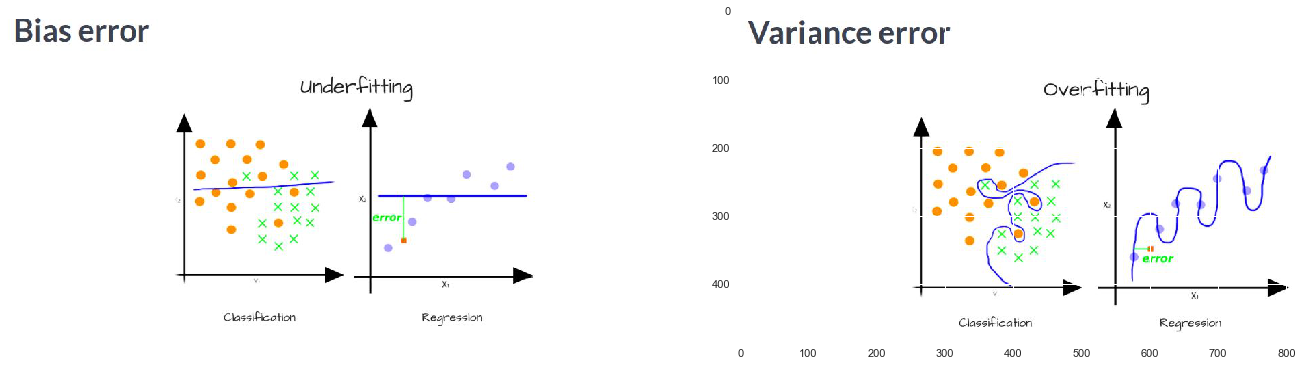

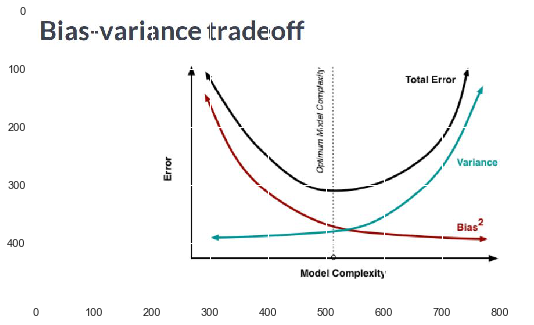

In [59]:
#vídeo

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "bias_error.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "variance_error.jpg")
plt.subplots_adjust(left=0, bottom=-0.3, right=3, top=1, wspace=0.3, hspace=0.3)
plt.imshow(imagem)
plt.show()

###

imagem = plt.imread(data_folder + "bias_variance_tradeoff.jpg")
plt.subplots_adjust(left=0, bottom=0, right=1.4, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

Exercício 11

In [60]:
# Test and training error

# In terms of the bias-variance tradeoff, which of the following is substantially more harmful to the test error than the
# training error?
print("""Variance. High variance results in overfitting to your training set. You'll see strong performance at first, until
you apply your model to your test set, where it will fail to generalize and likely struggle.""")

Variance. High variance results in overfitting to your training set. You'll see strong performance at first, until
you apply your model to your test set, where it will fail to generalize and likely struggle.


Exercício 12

In [61]:
%%script false
# Visualizing the tradeoff

# Use X and y to create a scatterplot
plt.scatter(X, y)

# Add your model predictions to the scatter plot 
plt.plot(np.sort(X), preds)

# Add the higher-complexity model predictions as well
plt.plot(np.sort(X), preds2)
plt.show()

Couldn't find program: 'false'


#### Exercício 13 - Fim

In [62]:
#vídeo

# Fim